###### Business problem : Analyse the pokemons.Get the future insights from the data regarding each pokemon which will help in improving their features.Pick the best 6 Pokemon lineup across ALL generations.Briefly analyze Legendary Pokemon.
###### How to solve the business problem : By using regression analysis (Logistic regression)
###### Variables used here : Name,Type 1,Type 2 - Index
   ##### Total,HP,Attack,Defense,SP.Attack,Sp.Def,Generation,Speed - Independent Variable
   ##### Legendary - Dependent variable

# Data Understanding

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Import the dataset
df = pd.read_csv('Poke.csv')

In [3]:
df.shape

(800, 13)

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318.0,45,49,49,65.0,65,45,1,False
1,2,Ivysaur,Grass,Poison,405.0,60,62,63,80.0,80,60,1,False
2,3,Venusaur,Grass,Poison,525.0,80,82,83,NaN,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625.0,80,100,123,122.0,120,80,1,False
4,4,Charmander,Fire,NaN,309.0,39,52,43,60.0,50,65,1,False


In [5]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,755.000000,800.000000,800.000000,800.000000,692.000000,800.000000,800.000000,800.00000
mean,362.813750,436.517881,69.258750,79.001250,73.842500,72.452312,71.902500,68.277500,3.32375
std,208.343798,120.245408,25.534669,32.457366,31.183501,31.967137,27.828916,29.060474,1.66129
min,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,2.00000
50%,364.500000,450.000000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,516.500000,80.000000,100.000000,90.000000,94.000000,90.000000,90.000000,5.00000
max,721.000000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
# Replace Missing values in ’Spl.Attack’ using Mean/Median
missing_col = df[['Sp. Atk']]
mean = df[['Sp. Atk']].mean()
t = missing_col.fillna(mean)
u = round(t)
u.head()

,Sp. Atk
0,65.0
1,80.0
2,72.0
3,122.0
4,60.0


In [7]:
df['Sp. Atk'] = u

In [8]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318.0,45,49,49,65.0,65,45,1,False
1,2,Ivysaur,Grass,Poison,405.0,60,62,63,80.0,80,60,1,False
2,3,Venusaur,Grass,Poison,525.0,80,82,83,72.0,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625.0,80,100,123,122.0,120,80,1,False
4,4,Charmander,Fire,NaN,309.0,39,52,43,60.0,50,65,1,False


In [9]:
df3 = df[['Sp. Atk']]

In [10]:
df3.head()

,Sp. Atk
0,65.0
1,80.0
2,72.0
3,122.0
4,60.0


In [11]:
# Delete the ‘Id’ column
df = df.drop(columns = '#')

In [12]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318.0,45,49,49,65.0,65,45,1,False
1,Ivysaur,Grass,Poison,405.0,60,62,63,80.0,80,60,1,False
2,Venusaur,Grass,Poison,525.0,80,82,83,72.0,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625.0,80,100,123,122.0,120,80,1,False
4,Charmander,Fire,NaN,309.0,39,52,43,60.0,50,65,1,False


In [13]:
# Group the Data according to column ‘Name’ using Pivot table
df1 = pd.pivot_table(df,index = ['Type 1','Type 2','Name'])

In [14]:
df1.head()

Attack  Defense  Generation  HP  \
Type 1 Type 2   Name                                                       
Bug    Electric Galvantula                   77       60           5  70   
                Joltik                       47       50           5  50   
       Fighting Heracross                   125       75           2  80   
                HeracrossMega Heracross     185      115           2  80   
       Fire     Larvesta                     85       55           5  55   

                                         Legendary  Sp. Atk  Sp. Def  Speed  \
Type 1 Type 2   Name                                                          
Bug    Electric Galvantula                   False     97.0       60    108   
                Joltik                       False     57.0       50     65   
       Fighting Heracross                    False     40.0       95     85   
                HeracrossMega Heracross      False     40.0      105     75   
       Fire     Larvesta                     False     72.0       55     60   

                                         Total  
Type 1 Type 2   Name                            
Bug    Electric Galvantula               472.0  
                Joltik                   319.0  
       Fighting Heracross                500.0  
                HeracrossMega Heracross  600.0  
       Fire     Larvesta                 360.0

In [15]:
# Check for max ‘Hp’ for a Pokémon along with ‘Name’
df[df['HP'] == df['HP'].max()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,Blissey,Normal,NaN,540.0,255,10,10,75.0,135,55,2,False


In [16]:
# Check for min ‘Hp’ for a Pokémon along with ‘Name’
df[df['HP'] == df['HP'].min()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
316,Shedinja,Bug,Ghost,236.0,1,90,45,30.0,30,40,3,False


In [17]:
# Change the ‘Name’,’Type1’, & ‘Type2’ column type to Category
cat = df.astype({"Name":'category',"Type 1":'category',"Type 2":'category'})
cat.dtypes

Name          category
Type 1        category
Type 2        category
Total          float64
HP               int64
Attack           int64
Defense          int64
Sp. Atk        float64
Sp. Def          int64
Speed            int64
Generation       int64
Legendary         bool
dtype: object

In [18]:
#Check for the missing values
df1.isnull().any()

Attack        False
Defense       False
Generation    False
HP            False
Legendary     False
Sp. Atk       False
Sp. Def       False
Speed         False
Total          True
dtype: bool

In [19]:
#Count the number of missing values in each column
df1.isnull().sum(axis=0)

Attack         0
Defense        0
Generation     0
HP             0
Legendary      0
Sp. Atk        0
Sp. Def        0
Speed          0
Total         17
dtype: int64

In [20]:
df.isnull().sum(axis=0)

Name            0
Type 1          0
Type 2        386
Total          45
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [21]:
# Replace Missing Values in ‘Type2’ with your name
df['Type 2'].fillna('Prakhar',inplace = True)

In [22]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318.0,45,49,49,65.0,65,45,1,False
1,Ivysaur,Grass,Poison,405.0,60,62,63,80.0,80,60,1,False
2,Venusaur,Grass,Poison,525.0,80,82,83,72.0,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625.0,80,100,123,122.0,120,80,1,False
4,Charmander,Fire,Prakhar,309.0,39,52,43,60.0,50,65,1,False


In [23]:
# Replace Missing values in ‘Total’ using Mean/Median
missing_col1 = df1[['Total']]
mean = df1[['Total']].mean()
d = missing_col1.fillna(mean)
v = round(d)
v.head()

Total
Type 1 Type 2   Name                          
Bug    Electric Galvantula               472.0
                Joltik                   319.0
       Fighting Heracross                500.0
                HeracrossMega Heracross  600.0
       Fire     Larvesta                 360.0

In [24]:
df1['Total'] = v

In [87]:
df1.head()

Attack  Defense  HP  Sp. Atk  \
Type 1 Type 2   Name                                                    
Bug    Electric Galvantula                   77       60  70     97.0   
                Joltik                       47       50  50     57.0   
       Fighting Heracross                   125       75  80     40.0   
                HeracrossMega Heracross     185      115  80     40.0   
       Fire     Larvesta                     85       55  55     72.0   

                                         Sp. Def  Speed  Total  Generation  \
Type 1 Type 2   Name                                                         
Bug    Electric Galvantula                    60    108  472.0           5   
                Joltik                        50     65  319.0           5   
       Fighting Heracross                     95     85  500.0           2   
                HeracrossMega Heracross      105     75  600.0           2   
       Fire     Larvesta                      55     60  360.0           5   

                                         Legendary  
Type 1 Type 2   Name                                
Bug    Electric Galvantula                   False  
                Joltik                       False  
       Fighting Heracross                    False  
                HeracrossMega Heracross      False  
       Fire     Larvesta                     False

In [26]:
# Identify Outliers using Standard Deviation and treat them
def detect_outlier(df):
    for i in df.describe().columns:
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        LTV = Q1 - 1.5*IQR 
        UTV = Q3 + 1.5*IQR
        df[i] = df[i].mask(df[i]<LTV,LTV)
        df[i] = df[i].mask(df[i]>UTV,UTV)
    return df

In [27]:
out = detect_outlier(df)

In [28]:
out

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318.0,45,49.0,49,65.000,65,45.0,1,False
1,Ivysaur,Grass,Poison,405.0,60,62.0,63,80.000,80,60.0,1,False
2,Venusaur,Grass,Poison,525.0,80,82.0,83,72.000,100,80.0,1,False
3,VenusaurMega Venusaur,Grass,Poison,625.0,80,100.0,123,122.000,120,80.0,1,False
4,Charmander,Fire,Prakhar,309.0,39,52.0,43,60.000,50,65.0,1,False
5,Charmeleon,Fire,Prakhar,405.0,58,64.0,58,80.000,65,80.0,1,False
6,Charizard,Fire,Flying,534.0,78,84.0,78,72.000,85,100.0,1,False
7,CharizardMega Charizard X,Fire,Dragon,634.0,78,130.0,111,130.000,85,100.0,1,False
8,CharizardMega Charizard Y,Fire,Flying,634.0,78,104.0,78,144.375,115,100.0,1,False
9,Squirtle,Water,Prakhar,314.0,44,48.0,65,50.000,64,43.0,1,False


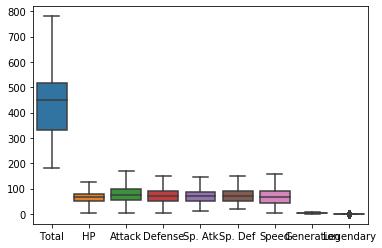

In [29]:
# Treated outliers
sns.boxplot(data = df)

In [30]:
correlations = df.corr()

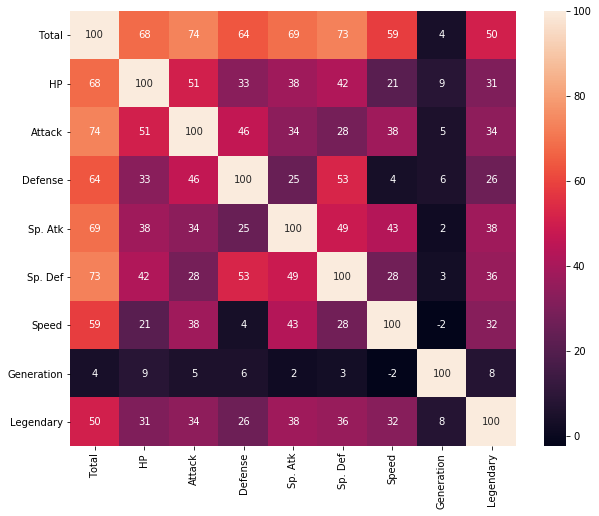

In [31]:
# Correlation Matrix of Dataset
plt.figure(figsize=(10,8))
correlations = correlations * 100
sns.heatmap(correlations,annot = True,fmt = '.0f')

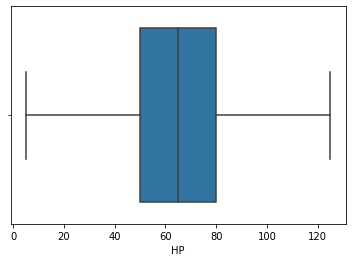

In [32]:
sns.boxplot(df['HP'])

#### Box plot for each numerical Variable

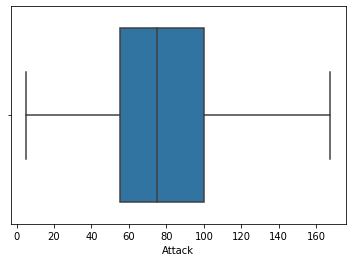

In [33]:
sns.boxplot(df['Attack'])

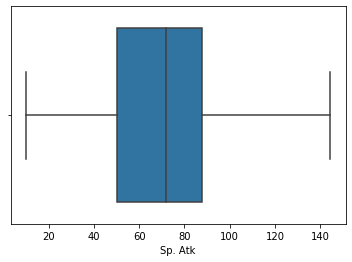

In [34]:
sns.boxplot(df['Sp. Atk'])

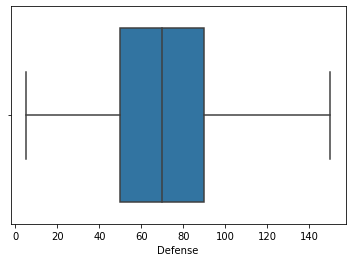

In [35]:
sns.boxplot(df['Defense'])

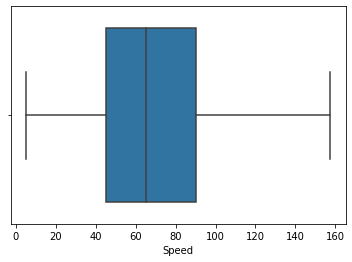

In [36]:
sns.boxplot(df['Speed'])

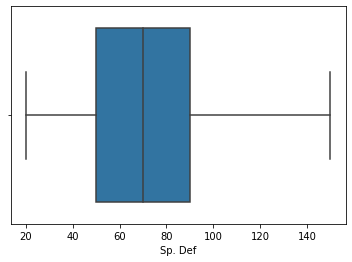

In [37]:
sns.boxplot(df['Sp. Def'])

#### Histogram for each numerical Variable

(array([  2.,   9.,  77., 126., 145., 186.,  94.,  94.,  35.,  32.]),
 array([  5.,  17.,  29.,  41.,  53.,  65.,  77.,  89., 101., 113., 125.]),
 <a list of 10 Patch objects>)

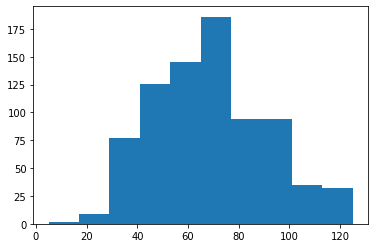

In [38]:
plt.hist(df['HP'])

(array([ 14.,  47., 123., 148., 180., 119.,  60.,  62.,  29.,  18.]),
 array([  5.  ,  21.25,  37.5 ,  53.75,  70.  ,  86.25, 102.5 , 118.75,
        135.  , 151.25, 167.5 ]),
 <a list of 10 Patch objects>)

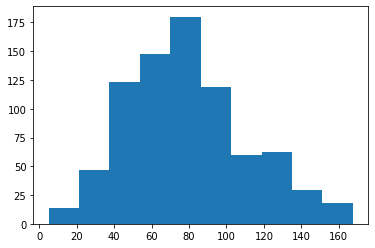

In [39]:
plt.hist(df['Attack'])

(array([  7.,  25., 129., 161., 162., 131.,  80.,  48.,  29.,  28.]),
 array([  5. ,  19.5,  34. ,  48.5,  63. ,  77.5,  92. , 106.5, 121. ,
        135.5, 150. ]),
 <a list of 10 Patch objects>)

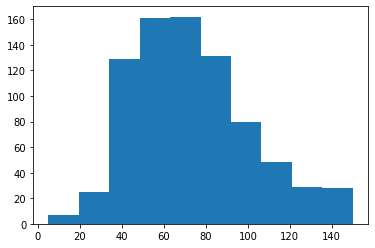

In [40]:
plt.hist(df['Defense'])

(array([ 13.,  64., 126., 113., 216.,  89.,  62.,  47.,  38.,  32.]),
 array([ 10.    ,  23.4375,  36.875 ,  50.3125,  63.75  ,  77.1875,
         90.625 , 104.0625, 117.5   , 130.9375, 144.375 ]),
 <a list of 10 Patch objects>)

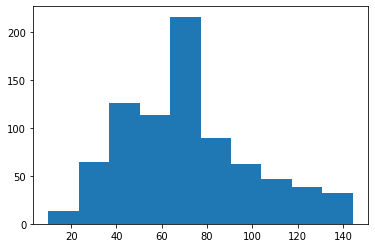

In [41]:
plt.hist(df['Sp. Atk'])

(array([ 40., 107., 131., 159., 116., 111.,  74.,  27.,  18.,  17.]),
 array([ 20.,  33.,  46.,  59.,  72.,  85.,  98., 111., 124., 137., 150.]),
 <a list of 10 Patch objects>)

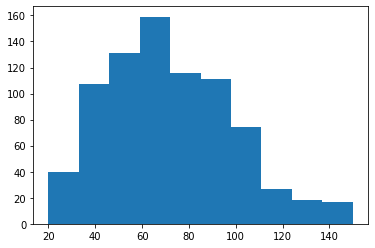

In [42]:
plt.hist(df['Sp. Def'])

(array([ 29.,  89., 145., 147., 131., 110.,  96.,  32.,  12.,   9.]),
 array([  5.  ,  20.25,  35.5 ,  50.75,  66.  ,  81.25,  96.5 , 111.75,
        127.  , 142.25, 157.5 ]),
 <a list of 10 Patch objects>)

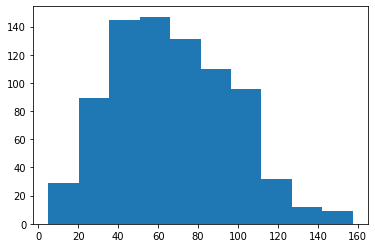

In [43]:
plt.hist(df['Speed'])

In [44]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318.0,45,49.0,49,65.0,65,45.0,1,False
1,Ivysaur,Grass,Poison,405.0,60,62.0,63,80.0,80,60.0,1,False
2,Venusaur,Grass,Poison,525.0,80,82.0,83,72.0,100,80.0,1,False
3,VenusaurMega Venusaur,Grass,Poison,625.0,80,100.0,123,122.0,120,80.0,1,False
4,Charmander,Fire,Prakhar,309.0,39,52.0,43,60.0,50,65.0,1,False


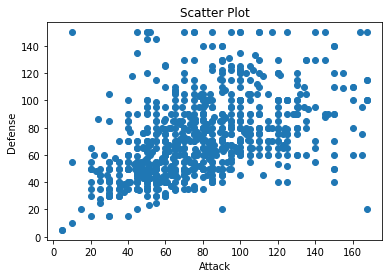

In [45]:
# Scatter plot between two variables
plt.scatter(df['Attack'],df['Defense'])
plt.title('Scatter Plot')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

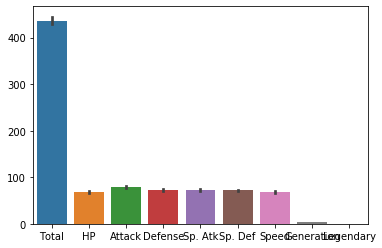

In [46]:
##Plot some Categorical plots using sea born
sns.barplot(data = df )

##### Define a function to check unique values in each column for whole Data

In [47]:
df['HP'].unique() 

array([ 45,  60,  80,  39,  58,  78,  44,  59,  79,  50,  40,  65,  63,
        83,  30,  55,  35,  75,  70,  90,  46,  61,  81,  95,  38,  73,
       115, 125,  10,  25,  52, 105,  85,  20,  48,  41,  91, 106, 100,
        28,  68,  31,   5,  64,  84, 104,  72, 110,  43,  66,  86,  99,
        76,  53,  37,  77,  67,  97, 111,  49,  71, 103,  57, 108,  74,
        69, 120, 116,  62,  54,  36,  51, 114, 109,  89,  92,  56,  88,
       123, 101,  82,  42], dtype=int64)

In [48]:
df['Attack'].unique() 

array([ 49. ,  62. ,  82. , 100. ,  52. ,  64. ,  84. , 130. , 104. ,
        48. ,  63. ,  83. , 103. ,  30. ,  20. ,  45. ,  35. ,  25. ,
        90. , 150. ,  60. ,  80. ,  56. ,  81. ,  85. ,  55. ,  75. ,
        47. ,  92. ,  57. ,  72. , 102. ,  70. ,  41. ,  76. ,  50. ,
        65. ,  95. , 105. , 110. ,  40. , 120. ,  73. ,   5. , 125. ,
        67. , 155. ,  10. , 115. , 135. , 134. , 167.5,  46. ,  38. ,
        58. ,  33. , 164. , 160. ,  51. ,  71. ,  91. , 140. ,  43. ,
        78. ,  15. , 165. ,  68. ,  23. , 145. ,  89. , 109. ,  66. ,
        86. ,  42. ,  29. ,  59. ,  79. ,  69. ,  94. , 136. ,  93. ,
        24. , 112. ,  61. , 106. , 132. , 123. ,  88. ,  53. ,  98. ,
        77. ,  27. , 117. , 108. ,  44. ,  87. , 147. ,  74. , 124. ,
        97. , 129. , 128. , 107. ,  36. ,  22. ,  54. , 121. , 131. ])

In [49]:
df['Defense'].unique() 

array([ 49,  63,  83, 123,  43,  58,  78, 111,  65,  80, 100, 120,  35,
        55,  50,  30,  40,  75,  60,  44,  69,  85, 110,  52,  67,  87,
        57,  77,  48,  73,  20,  45,  70,  25,  95,  15, 115, 130, 150,
        90,  53,  79,   5, 109, 125, 105,  64,  34,  38,  28,  42, 140,
        62,  37,  10,  41,  61,  32,  23, 135,  97,  71,  68,  88,  51,
       118, 102,  66,  84,  94,  47,  86, 116, 108,  72,  56,  76, 145,
       107, 106,  39, 126,  59,  99,  89, 103, 133,  82,  91, 131, 112,
       129, 122,  54,  33, 119, 121], dtype=int64)

In [50]:
df['Sp. Atk'].unique() 

array([ 65.   ,  80.   ,  72.   , 122.   ,  60.   , 130.   , 144.375,
        50.   ,  85.   ,  20.   ,  25.   ,  90.   ,  45.   ,  15.   ,
        35.   ,  70.   , 135.   ,  31.   ,  61.   ,  40.   ,  55.   ,
        75.   ,  95.   ,  81.   ,  30.   , 110.   , 100.   , 105.   ,
       120.   ,  58.   , 115.   ,  43.   ,  73.   , 125.   ,  49.   ,
        63.   ,  83.   ,  44.   ,  59.   ,  79.   ,  76.   ,  56.   ,
        10.   , 140.   ,  51.   ,  91.   ,  47.   ,  46.   ,  93.   ,
        23.   ,  74.   ,  94.   ,  78.   , 104.   , 111.   ,  42.   ,
        29.   ,  69.   ,  62.   ,  87.   ,  57.   ,  54.   ,  64.   ,
        71.   ,  24.   ,  92.   ,  38.   ,  68.   ,  86.   , 116.   ,
       108.   ,  53.   ,  67.   , 107.   ,  36.   ,  77.   ,  37.   ,
       103.   , 112.   ,  97.   ,  48.   , 129.   , 128.   , 114.   ,
        32.   ,  27.   , 109.   ,  39.   ,  99.   , 131.   ])

In [51]:
df['Sp. Def'].unique() 

array([ 65,  80, 100, 120,  50,  85, 115,  64, 105,  20,  25,  35,  70,
        31,  61,  54,  79,  30,  55,  40,  75,  90,  45,  95,  60,  62,
       110, 130,  48, 125,  63,  83,  56,  96,  76,  42,  58, 150, 140,
       135,  41,  52,  82,  23,  43,  73,  53,  71,  87, 107,  33,  44,
       101,  51,  34,  49,  88, 138, 102,  78,  66,  37,  59,  86, 116,
       108,  72,  77, 106,  39,  69,  32, 126,  67,  99, 129, 128,  36,
        38,  98,  57,  81,  89,  46, 123,  94,  92, 113], dtype=int64)

In [52]:
df['Legendary'].unique() 

array([False,  True])

In [53]:
df['Generation'].unique() 

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [54]:
df['Speed'].unique() 

array([ 45. ,  60. ,  80. ,  65. , 100. ,  43. ,  58. ,  78. ,  30. ,
        70. ,  50. ,  35. ,  75. , 145. ,  56. ,  71. , 101. , 121. ,
        72. ,  97. ,  55. ,  90. , 110. ,  40. ,  41. ,  76. ,  85. ,
        20. ,  25. ,  95. , 120. , 115. , 105. , 150. ,  15. , 130. ,
        42. ,  67. , 140. ,  87. ,  63. ,  68. ,  93. ,  81. ,  48. ,
        91. ,  33. ,   5. ,  83. ,  51. ,  61. , 125. , 157.5,  28. ,
       135. ,  10. ,  23. ,  32. ,  52. ,  31. ,  36. , 108. ,  66. ,
        34. ,  39. , 112. ,  74. ,  84. ,  82. , 102. ,  92. ,  47. ,
        46. ,  86. ,  77. , 127. , 113. , 106. ,  64. ,  24. ,  29. ,
       116. , 114. ,  88. ,  69. ,  57. ,  98. ,  22. ,  44. ,  59. ,
        79. , 103. , 109. ,  38. , 111. , 128. ,  99. ,  73. , 104. ,
       122. ,  62. , 126. ,  89. ,  49. , 118. ,  54. , 123. ])

In [55]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318.0,45,49.0,49,65.0,65,45.0,1,False
1,Ivysaur,Grass,Poison,405.0,60,62.0,63,80.0,80,60.0,1,False
2,Venusaur,Grass,Poison,525.0,80,82.0,83,72.0,100,80.0,1,False
3,VenusaurMega Venusaur,Grass,Poison,625.0,80,100.0,123,122.0,120,80.0,1,False
4,Charmander,Fire,Prakhar,309.0,39,52.0,43,60.0,50,65.0,1,False


# Data Preparation

In [56]:
# Apply Standard Scalar function to the Numerical Columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [57]:
print(scaler.transform(df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]))

[[-1.04099298e+00 -9.30560370e-01 -8.36333994e-01 -2.45059335e-01
  -2.47914457e-01 -8.03393977e-01]
 [-3.76882626e-01 -5.25943532e-01 -3.52554388e-01  2.80325814e-01
   3.07117909e-01 -2.84991669e-01]
 [ 5.08597847e-01  9.65439120e-02  3.38559335e-01  1.20400763e-04
   1.04716106e+00  4.06211409e-01]
 ...
 [ 5.08597847e-01  9.68026333e-01 -4.56221446e-01  2.53510374e+00
   2.15722580e+00  6.06098699e-02]
 [ 5.08597847e-01  2.52424494e+00 -4.56221446e-01  1.20400763e-04
   2.15722580e+00  4.06211409e-01]
 [ 5.08597847e-01  9.68026333e-01  1.61711972e+00  2.03160964e+00
   6.77139487e-01  6.06098699e-02]]


In [58]:
import pandas_profiling as pp

In [60]:
pp.ProfileReport(df)

In [59]:
# Define a function to compare different stats between two Pokémon visually
def comp_pok(name1,name2,param):
    a = df[(df.Name == name1) | (df.Name == name2)]
    sns.factorplot(x='Name',y=param,data=a,kind='bar',size=5,aspect=1,palette=['#0000ff','#FFB6C1'])

C:\Users\Windows 10\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Windows 10\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


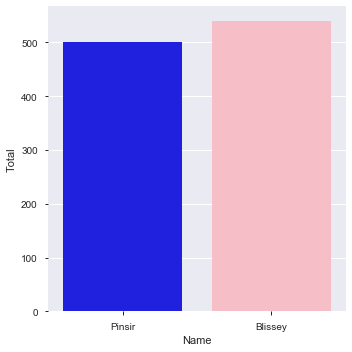

In [60]:
comp_pok('Blissey','Pinsir','Total')

In [61]:
df1.head()

Attack  Defense  Generation  HP  \
Type 1 Type 2   Name                                                       
Bug    Electric Galvantula                   77       60           5  70   
                Joltik                       47       50           5  50   
       Fighting Heracross                   125       75           2  80   
                HeracrossMega Heracross     185      115           2  80   
       Fire     Larvesta                     85       55           5  55   

                                         Legendary  Sp. Atk  Sp. Def  Speed  \
Type 1 Type 2   Name                                                          
Bug    Electric Galvantula                   False     97.0       60    108   
                Joltik                       False     57.0       50     65   
       Fighting Heracross                    False     40.0       95     85   
                HeracrossMega Heracross      False     40.0      105     75   
       Fire     Larvesta                     False     72.0       55     60   

                                         Total  
Type 1 Type 2   Name                            
Bug    Electric Galvantula               472.0  
                Joltik                   319.0  
       Fighting Heracross                500.0  
                HeracrossMega Heracross  600.0  
       Fire     Larvesta                 360.0

In [62]:
new_column = df1['Generation']
df1['Gen'] = new_column

In [63]:
df1.pop('Generation')

Type 1  Type 2    Name                   
Bug     Electric  Galvantula                 5
                  Joltik                     5
        Fighting  Heracross                  2
                  HeracrossMega Heracross    2
        Fire      Larvesta                   5
                  Volcarona                  5
        Flying    Beautifly                  3
                  Butterfree                 1
                  Combee                     4
                  Ledian                     2
                  Ledyba                     2
                  Masquerain                 3
                  Mothim                     4
                  Ninjask                    3
                  PinsirMega Pinsir          1
                  Scyther                    1
                  Vespiquen                  4
                  Vivillon                   6
                  Yanma                      2
                  Yanmega                    4
        Ghost     

In [64]:
df1.head()

Attack  Defense  HP  Legendary  \
Type 1 Type 2   Name                                                      
Bug    Electric Galvantula                   77       60  70      False   
                Joltik                       47       50  50      False   
       Fighting Heracross                   125       75  80      False   
                HeracrossMega Heracross     185      115  80      False   
       Fire     Larvesta                     85       55  55      False   

                                         Sp. Atk  Sp. Def  Speed  Total  Gen  
Type 1 Type 2   Name                                                          
Bug    Electric Galvantula                  97.0       60    108  472.0    5  
                Joltik                      57.0       50     65  319.0    5  
       Fighting Heracross                   40.0       95     85  500.0    2  
                HeracrossMega Heracross     40.0      105     75  600.0    2  
       Fire     Larvesta                    72.0       55     60  360.0    5

In [65]:
df1 = df1.rename(columns = {'Gen':'Generation'})

In [66]:
df1.head()

Attack  Defense  HP  Legendary  \
Type 1 Type 2   Name                                                      
Bug    Electric Galvantula                   77       60  70      False   
                Joltik                       47       50  50      False   
       Fighting Heracross                   125       75  80      False   
                HeracrossMega Heracross     185      115  80      False   
       Fire     Larvesta                     85       55  55      False   

                                         Sp. Atk  Sp. Def  Speed  Total  \
Type 1 Type 2   Name                                                      
Bug    Electric Galvantula                  97.0       60    108  472.0   
                Joltik                      57.0       50     65  319.0   
       Fighting Heracross                   40.0       95     85  500.0   
                HeracrossMega Heracross     40.0      105     75  600.0   
       Fire     Larvesta                    72.0       55     60  360.0   

                                         Generation  
Type 1 Type 2   Name                                 
Bug    Electric Galvantula                        5  
                Joltik                            5  
       Fighting Heracross                         2  
                HeracrossMega Heracross           2  
       Fire     Larvesta                          5

In [67]:
new_col = df1['Legendary']
df1['Leg'] = new_col

In [68]:
df1.head()

Attack  Defense  HP  Legendary  \
Type 1 Type 2   Name                                                      
Bug    Electric Galvantula                   77       60  70      False   
                Joltik                       47       50  50      False   
       Fighting Heracross                   125       75  80      False   
                HeracrossMega Heracross     185      115  80      False   
       Fire     Larvesta                     85       55  55      False   

                                         Sp. Atk  Sp. Def  Speed  Total  \
Type 1 Type 2   Name                                                      
Bug    Electric Galvantula                  97.0       60    108  472.0   
                Joltik                      57.0       50     65  319.0   
       Fighting Heracross                   40.0       95     85  500.0   
                HeracrossMega Heracross     40.0      105     75  600.0   
       Fire     Larvesta                    72.0       55     60  360.0   

                                         Generation    Leg  
Type 1 Type 2   Name                                        
Bug    Electric Galvantula                        5  False  
                Joltik                            5  False  
       Fighting Heracross                         2  False  
                HeracrossMega Heracross           2  False  
       Fire     Larvesta                          5  False

In [69]:
df1.pop('Legendary')

Type 1  Type 2    Name                   
Bug     Electric  Galvantula                 False
                  Joltik                     False
        Fighting  Heracross                  False
                  HeracrossMega Heracross    False
        Fire      Larvesta                   False
                  Volcarona                  False
        Flying    Beautifly                  False
                  Butterfree                 False
                  Combee                     False
                  Ledian                     False
                  Ledyba                     False
                  Masquerain                 False
                  Mothim                     False
                  Ninjask                    False
                  PinsirMega Pinsir          False
                  Scyther                    False
                  Vespiquen                  False
                  Vivillon                   False
                  Yanma                 

In [70]:
df1.head()

Attack  Defense  HP  Sp. Atk  \
Type 1 Type 2   Name                                                    
Bug    Electric Galvantula                   77       60  70     97.0   
                Joltik                       47       50  50     57.0   
       Fighting Heracross                   125       75  80     40.0   
                HeracrossMega Heracross     185      115  80     40.0   
       Fire     Larvesta                     85       55  55     72.0   

                                         Sp. Def  Speed  Total  Generation  \
Type 1 Type 2   Name                                                         
Bug    Electric Galvantula                    60    108  472.0           5   
                Joltik                        50     65  319.0           5   
       Fighting Heracross                     95     85  500.0           2   
                HeracrossMega Heracross      105     75  600.0           2   
       Fire     Larvesta                      55     60  360.0           5   

                                           Leg  
Type 1 Type 2   Name                            
Bug    Electric Galvantula               False  
                Joltik                   False  
       Fighting Heracross                False  
                HeracrossMega Heracross  False  
       Fire     Larvesta                 False

In [71]:
df1 = df1.rename(columns = {'Leg':'Legendary'})

In [72]:
df1.head()

Attack  Defense  HP  Sp. Atk  \
Type 1 Type 2   Name                                                    
Bug    Electric Galvantula                   77       60  70     97.0   
                Joltik                       47       50  50     57.0   
       Fighting Heracross                   125       75  80     40.0   
                HeracrossMega Heracross     185      115  80     40.0   
       Fire     Larvesta                     85       55  55     72.0   

                                         Sp. Def  Speed  Total  Generation  \
Type 1 Type 2   Name                                                         
Bug    Electric Galvantula                    60    108  472.0           5   
                Joltik                        50     65  319.0           5   
       Fighting Heracross                     95     85  500.0           2   
                HeracrossMega Heracross      105     75  600.0           2   
       Fire     Larvesta                      55     60  360.0           5   

                                         Legendary  
Type 1 Type 2   Name                                
Bug    Electric Galvantula                   False  
                Joltik                       False  
       Fighting Heracross                    False  
                HeracrossMega Heracross      False  
       Fire     Larvesta                     False

# Modelling

In [73]:
##Separate the input & output from data
X = df1.iloc[:,0:6]
y = df1.iloc[:,8]
X

Attack  Defense   HP  Sp. Atk  \
Type 1 Type 2   Name                                                     
Bug    Electric Galvantula                   77       60   70     97.0   
                Joltik                       47       50   50     57.0   
       Fighting Heracross                   125       75   80     40.0   
                HeracrossMega Heracross     185      115   80     40.0   
       Fire     Larvesta                     85       55   55     72.0   
                Volcarona                    60       65   85    135.0   
       Flying   Beautifly                    70       50   60    100.0   
                Butterfree                   45       50   60     90.0   
                Combee                       30       42   30     30.0   
                Ledian                       35       50   55     55.0   
                Ledyba                       20       30   40     40.0   
                Masquerain                   60       62   70     80.0   
                Mothim                       94       50   70     94.0   
                Ninjask                      90       45   61     50.0   
                PinsirMega Pinsir           155      120   65     65.0   
                Scyther                     110       80   70     55.0   
                Vespiquen                    80      102   70     80.0   
                Vivillon                     52       50   80     90.0   
                Yanma                        65       45   65     75.0   
                Yanmega                      76       86   86    116.0   
       Ghost    Shedinja                     90       45    1     30.0   
       Grass    Leavanny                    103       80   75     70.0   
                Paras                        70       55   35     45.0   
                Parasect                     95       80   60     60.0   
                Sewaddle                     53       70   45     72.0   
                Swadloon                     63       90   55     50.0   
                WormadamPlant Cloak          59       85   60     79.0   
       Ground   Nincada                      45       90   31     30.0   
                WormadamSandy Cloak          79      105   60     59.0   
       Poison   Ariados                      90       70   70     60.0   
...                                         ...      ...  ...      ...   
Water  Ghost    Jellicent                    60       70  100     85.0   
       Grass    Lombre                       50       50   60     60.0   
                Lotad                        30       30   40     40.0   
                Ludicolo                     70       70   80     90.0   
       Ground   Barboach                     48       43   50     46.0   
                Gastrodon                    83       68  111     72.0   
                Marshtomp                    85       70   70     60.0   
                Palpitoad                    65       55   75     65.0   
                Quagsire                     85       85   95     65.0   
                Seismitoad                   95       75  105     85.0   
                Swampert                    110       90  100     72.0   
                SwampertMega Swampert       150      110  100     95.0   
                Whiscash                     78       73  110     76.0   
                Wooper                       45       45   55     25.0   
       Ice      Cloyster                     95      180   50     72.0   
                Dewgong                      70       80   90     70.0   
                Lapras                       85       80  130     85.0   
       Poison   Qwilfish                     95       75   65     55.0   
                Tentacool                    40       35   40     50.0   
                Tentacruel                   70       65   80     80.0   
       Psychic  Slowbro                      75      110   95     72.0   
                SlowbroMega Slowbro          

In [74]:
X.isnull().sum()

Attack     0
Defense    0
HP         0
Sp. Atk    0
Sp. Def    0
Speed      0
dtype: int64

In [75]:
##Divide the data as train & test using train test split with test as 0.25 size
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=25)

##### Try k-fold cross validation on the training with respective model

In [76]:
# Import the model libraries from sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
##Initialize parameters
num_folds = 10
seed = 25
kfold = KFold(n_splits=num_folds, random_state=seed)
c = LogisticRegression()      
model_fit = c.fit(x_train,y_train)

# Fitting the model and Extracting the results
results1 = cross_val_score(c, X, y, cv=kfold)

# Check the accuracy
print("Accuracy: ", results1*100.0)
print(results1.mean()*100.0, results1.std()*100.0)

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy:  [100.          88.0952381   73.80952381  88.0952381   95.12195122
  90.24390244  95.12195122  85.36585366  90.24390244 100.        ]
90.60975609756096 7.346650854781793


C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

In [77]:
model_fit = c.fit(x_train,y_train)

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:
# Getting the coefficient and intercepts
print(c.coef_)
print(c.intercept_)

[[ 0.01369347 -0.01656511  0.01257878  0.01274983  0.01939194  0.00047989]]
[-5.55922052]


In [79]:
# Predicted value
y_pred = c.predict(x_test)

In [80]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[96,  0],
       [ 8,  0]], dtype=int64)

In [81]:
# Checking accuracy score
accuracy_score(y_test, y_pred)

0.9230769230769231

In [82]:
result = model_fit.score(x_test,y_test)

In [83]:
result

0.9230769230769231

In [84]:
y_pred.dtype

dtype('bool')

In [86]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,y_pred)

C:\Users\Windows 10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(array([0.92307692, 0.        ]),
 array([1., 0.]),
 array([0.96, 0.  ]),
 array([96,  8], dtype=int64))

## Points observed in analysis : 

##### 1. We are having a Pokemon dataset. In  that we observed missing values in numerical columns like 'Sp. Atk','Total'. We replaced the missing values with the mean in our model. We observed missing values in categorical columns like 'Type 2' which we replaced with our names as given in the question.
##### 2. Made a boxplot of each column and found out that we are having outliers in each column.Calculated the IQR.Then treated the outliers by using LTV,UTV method.
##### 3. Set columns 'Name','Type 1','Type 2' as index variable by using Pivot table.
##### 4. Defined a function to check unique values in each column for whole Data.
##### 5. Define a function along with loops to compare different stats between two Pokémon visually.
##### 6. Applied the StandardScaler function to arrange the data in normal distribution with Mean = 0 and Standard Deviation = 1
##### 7. Modelling was done.Here we split the data into X(independent variable) and y(dependent variable).Then divide the data as train and test using train test split with test size as 0.25
##### 8. Did k-fold cross validation on the training data with respective Logistic Regression model.
##### 9. Fitted the training data in the model.Then we predicted the output for test data and compare actual and predicted results of test data.Thus I got the accuracy of 92.3 %.